# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.88'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym50,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model
0,187-1-116-B--Spectrum--010--Spec.Data 1,103.897183,0.049518,1284.255622,0.047179,36.818116,1284.255622,107.767320,1.098484,1.200141,...,1.121711,1.061937,0.267394,0.059671,1.028889,1.079032,0.044668,0.019519,PseudoVoigtModel,PseudoVoigtModel
1,187-1-116-B--Spectrum--012--Spec.Data 1_CRR_Di...,103.889846,0.040538,1284.211766,0.037533,40.584634,1284.211766,106.196321,0.935951,1.183928,...,1.062385,1.048077,0.116779,0.046123,1.180328,1.026114,0.245357,0.018005,PseudoVoigtModel,PseudoVoigtModel
2,187-1-116-B--Spectrum--013--Spec.Data 1,103.905064,0.049180,1284.291492,0.046425,33.889359,1284.291492,93.597276,1.019771,1.332785,...,1.065404,1.102343,0.133395,0.060182,1.058166,1.210351,0.089040,0.022025,PseudoVoigtModel,PseudoVoigtModel
3,187-1-117-A--Spectrum--020--Spec.Data 1_CRR_Di...,104.148924,0.030104,1283.735194,0.030041,1441.820414,1283.735244,4312.564313,1.111184,9.001038,...,1.019697,1.041111,0.043774,0.001541,1.105495,1.098592,0.168612,0.000501,PseudoVoigtModel,PseudoVoigtModel
4,187-1-117-A--Spectrum--021--Spec.Data 1,104.156412,0.006316,1283.738424,0.006035,1482.264114,1283.738474,4454.564518,1.120090,8.060225,...,1.011976,1.005429,0.026828,0.001511,1.110619,1.098746,0.176119,0.000481,PseudoVoigtModel,PseudoVoigtModel


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'FG', 'Cap','window','Video'],
 sort=True)
diad_meta[0]

'007 187-1-116-A-nodiad--Spectrum--006--Information.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 55/55 [00:00<00:00, 1250.03it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-116-A-nodiad--Spectrum--006--Information...,"January 19, 2024\n",January,19.0,6.003,60.0,2.0,50.0,"['0h', '2m', '40s']",12:29:58 PM\n,44998.0,1325.004
1,187-1-116-B--Spectrum--010--Information.txt,"January 19, 2024\n",January,19.0,5.978,60.0,5.0,100.0,"['0h', '5m', '1s']",12:41:52 PM\n,45712.0,1325.004
2,187-1-116-B--Spectrum--012--Information.txt,"January 19, 2024\n",January,19.0,5.950,60.0,5.0,100.0,"['0h', '5m', '2s']",12:55:21 PM\n,46521.0,1325.004
3,187-1-116-B--Spectrum--013--Information.txt,"January 19, 2024\n",January,19.0,5.944,60.0,5.0,100.0,"['0h', '5m', '1s']",1:00:42 PM\n,46842.0,1325.004
4,187-1-117-A--Spectrum--020--Information.txt,"January 19, 2024\n",January,19.0,5.930,60.0,5.0,50.0,"['0h', '5m', '2s']",1:14:20 PM\n,47660.0,1325.004


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'187-1-116-A-nodiad--Spectrum--006--Information'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['187-1-116-A-nodiad--Spectrum--006', '187-1-116-B--Spectrum--010',
       '187-1-116-B--Spectrum--012', '187-1-116-B--Spectrum--013',
       '187-1-117-A--Spectrum--020', '187-1-117-A--Spectrum--021',
       '187-1-117-A--Spectrum--022', '187-1-117-B--Spectrum--024',
       '187-1-117-B--Spectrum--025', '187-1-117-B--Spectrum--026',
       '187-1-118-A--Spectrum--033', '187-1-118-A--Spectrum--034',
       'de--Spectrum--041', '187-1-119-A--Spectrum--042',
       '187-1-120-reg1-A--Spectrum--053',
       '187-1-120-reg1-A--Spectrum--054',
       '187-1-120-reg1-A--Spectrum--055',
       '187-1-120-reg2-A--Spectrum--060', '187-1-121-A--Spectrum--068',
       '187-1-121-B--Spectrum--070', '187-1-121-C--Spectrum--072',
       '187-1-121-C--Spectrum--073', '187-1-121-C--Spectrum--074',
       '187-1-121-D--Spectrum--075', '187-1-121-E--Spectrum--078',
       '187-1-121-F--Spectrum--080', '187-1-121-G--Spectrum--083',
       '187-1-121-H--Spectrum--085', '187-1-121-I--Spectrum--088',


## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-1-116-B--Spectrum--010--Spec.Data 1


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-1-116-B--Spectrum--010', '187-1-116-B--Spectrum--012',
       '187-1-116-B--Spectrum--013', '187-1-117-A--Spectrum--020',
       '187-1-117-A--Spectrum--021', '187-1-117-A--Spectrum--022',
       '187-1-117-B--Spectrum--024', '187-1-117-B--Spectrum--025',
       '187-1-117-B--Spectrum--026', '187-1-118-A--Spectrum--033',
       '187-1-118-A--Spectrum--034', '187-1-119-A--Spectrum--042',
       '187-1-120-reg1-A--Spectrum--053',
       '187-1-120-reg1-A--Spectrum--054',
       '187-1-120-reg1-A--Spectrum--055',
       '187-1-120-reg2-A--Spectrum--060', '187-1-121-A--Spectrum--068',
       '187-1-121-B--Spectrum--070', '187-1-121-D--Spectrum--075',
       '187-1-121-E--Spectrum--078', '187-1-121-G--Spectrum--083',
       '187-1-121-H--Spectrum--085', '187-1-121-I--Spectrum--088',
       '187-1-121-I--Spectrum--089', '187-1-121-J--Spectrum--091',
       '187-1-121-K--Spectrum--093', '187-1-121-L--Spectrum--095',
       '187-1-121-M--Spectrum--097', '187-1-122-A--Spectrum--104'

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-116-B--Spectrum--010,103.897183,0.049518,1284.255622,0.047179,36.818116,1284.255622,107.767320,1.098484,1.200141,...,January,19.0,5.978,60.0,5.0,100.0,"['0h', '5m', '1s']",12:41:52 PM\n,45712.0,1325.004
1,187-1-116-B--Spectrum--012,103.889846,0.040538,1284.211766,0.037533,40.584634,1284.211766,106.196321,0.935951,1.183928,...,January,19.0,5.950,60.0,5.0,100.0,"['0h', '5m', '2s']",12:55:21 PM\n,46521.0,1325.004
2,187-1-116-B--Spectrum--013,103.905064,0.049180,1284.291492,0.046425,33.889359,1284.291492,93.597276,1.019771,1.332785,...,January,19.0,5.944,60.0,5.0,100.0,"['0h', '5m', '1s']",1:00:42 PM\n,46842.0,1325.004
3,187-1-117-A--Spectrum--020,104.148924,0.030104,1283.735194,0.030041,1441.820414,1283.735244,4312.564313,1.111184,9.001038,...,January,19.0,5.930,60.0,5.0,50.0,"['0h', '5m', '2s']",1:14:20 PM\n,47660.0,1325.004
4,187-1-117-A--Spectrum--021,104.156412,0.006316,1283.738424,0.006035,1482.264114,1283.738474,4454.564518,1.120090,8.060225,...,January,19.0,5.923,60.0,5.0,50.0,"['0h', '5m', '1s']",1:20:26 PM\n,48026.0,1325.004


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    SO2_ratio=pf.calculate_CO2_SO2_ratio(peak_area_SO2=df_combo_sec_phase['Peak_Area_SO2'], 
peak_area_diad1=df_combo_sec_phase['Diad1_Voigt_Area'], peak_area_diad2=df_combo_sec_phase['Diad2_Voigt_Area'],
wavelength=532.067, T_K=37+273.15, efficiency_SO2=1, efficiency_CO2=0.5, 
sigma_SO2=4.03, sigma_CO2_v1=0.8, sigma_CO2_v2=1.23)
    df_combo_sec_phase['SO2_mol_ratio']=SO2_ratio['SO2']

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

1.2791241081641006e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-116-B--Spectrum--010,0.378663,0.021801,0.021674,0.002348,103.665811,0.049426,0.001369,0.049518,5.978,...,45712.0,NaN,NaN,NaN,NaN,NaN,45712.0,0.997773,0.997760,0.997786
1,187-1-116-B--Spectrum--012,0.375185,0.017874,0.017719,0.002348,103.657874,0.040470,0.001358,0.040538,5.950,...,46521.0,NaN,NaN,NaN,NaN,NaN,46521.0,0.997767,0.997754,0.997780
2,187-1-116-B--Spectrum--013,0.381738,0.021682,0.021555,0.002348,103.672820,0.049088,0.001354,0.049180,5.944,...,46842.0,1097.177068,6.757782,10.335133,Spline,0.027373,46842.0,0.997765,0.997752,0.997778
3,187-1-117-A--Spectrum--020,0.490972,0.014079,0.013881,0.002354,103.915553,0.030067,0.001346,0.030104,5.930,...,47660.0,1112.796252,537.624648,61.206347,Spline,0.047248,47660.0,0.997759,0.997746,0.997772
4,187-1-117-A--Spectrum--021,0.494308,0.003798,0.002979,0.002355,103.922773,0.006443,0.001342,0.006316,5.923,...,48026.0,1113.933092,483.580846,53.910410,Spline,0.041036,48026.0,0.997757,0.997744,0.997770


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

1.2791241081641006e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-116-B--Spectrum--010,0.378663,0.021801,0.021674,0.002348,103.665811,0.049426,0.001369,0.049518,5.978,...,45712.0,NaN,NaN,NaN,NaN,NaN,45712.0,0.997773,0.997760,0.997786
1,187-1-116-B--Spectrum--012,0.375185,0.017874,0.017719,0.002348,103.657874,0.040470,0.001358,0.040538,5.950,...,46521.0,NaN,NaN,NaN,NaN,NaN,46521.0,0.997767,0.997754,0.997780
2,187-1-116-B--Spectrum--013,0.381738,0.021682,0.021555,0.002348,103.672820,0.049088,0.001354,0.049180,5.944,...,46842.0,1097.177068,6.757782,10.335133,Spline,0.027373,46842.0,0.997765,0.997752,0.997778
3,187-1-117-A--Spectrum--020,0.490972,0.014079,0.013881,0.002354,103.915553,0.030067,0.001346,0.030104,5.930,...,47660.0,1112.796252,537.624648,61.206347,Spline,0.047248,47660.0,0.997759,0.997746,0.997772
4,187-1-117-A--Spectrum--021,0.494308,0.003798,0.002979,0.002355,103.922773,0.006443,0.001342,0.006316,5.923,...,48026.0,1113.933092,483.580846,53.910410,Spline,0.041036,48026.0,0.997757,0.997744,0.997770


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_January 19, 2024_fitted_2024-04-29.xlsx


## This helps visualize the errors on each spectra 

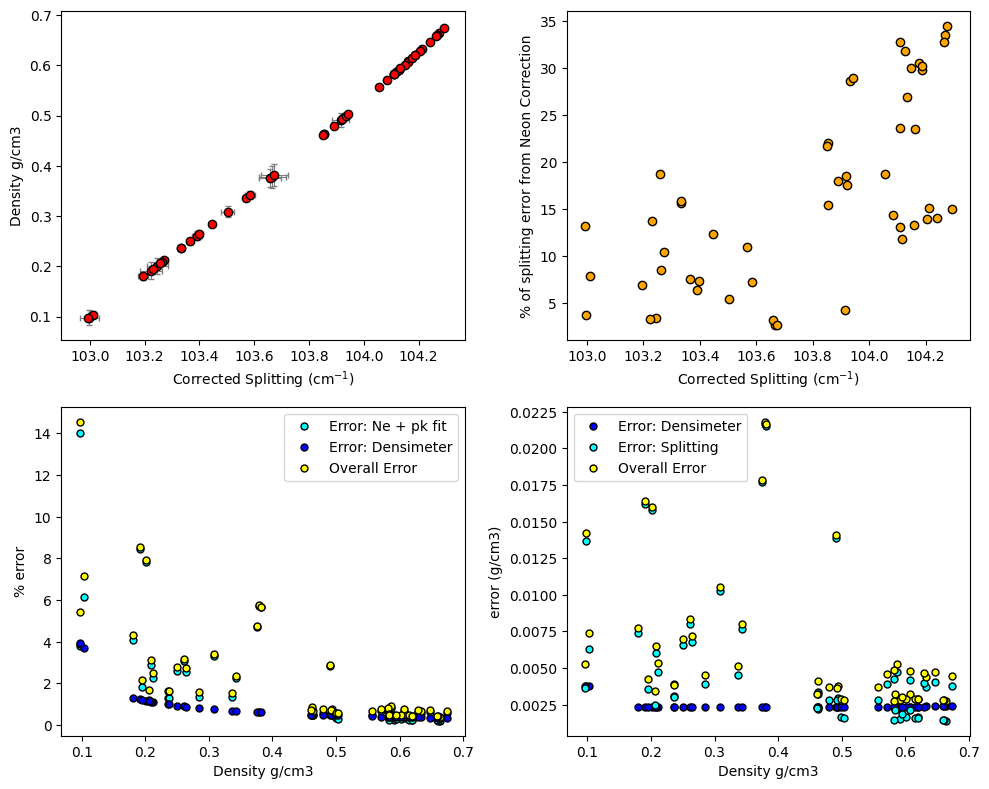

In [16]:
df=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

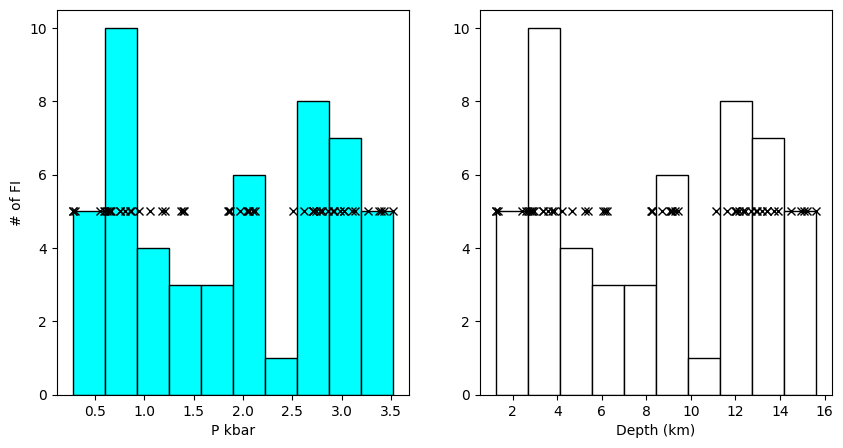

In [17]:
# Calculate pressure with a temperature estimate
Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')